In [1]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt # 그래프 모드
import seaborn as sns 
import missingno as msno # 결측치를 시각화

In [4]:
df = pd.read_csv('london_merged.csv', parse_dates=['timestamp']) # timestamp를 datetime 형태로 가져오기
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [14]:
df = pd.read_csv('../input/london-bike-sharing-dataset/london_merged.csv', parse_dates=['timestamp']) # timestamp를 datetime 형태로 가져오기
df.head()

In [5]:
# 데이터 타입과 구조
print('데이터의 구조는: ', df.shape)
print('데이터의 타입은: ', df.dtypes)
print('데이터의 칼럼은: ', df.columns)

데이터의 구조는:  (17414, 10)
데이터의 타입은:  timestamp       datetime64[ns]
cnt                      int64
t1                     float64
t2                     float64
hum                    float64
wind_speed             float64
weather_code           float64
is_holiday             float64
is_weekend             float64
season                 float64
dtype: object
데이터의 칼럼은:  Index(['timestamp', 'cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code',
       'is_holiday', 'is_weekend', 'season'],
      dtype='object')


In [6]:
# 결측치 확인
df.isnull().sum()

timestamp       0
cnt             0
t1              0
t2              0
hum             0
wind_speed      0
weather_code    0
is_holiday      0
is_weekend      0
season          0
dtype: int64

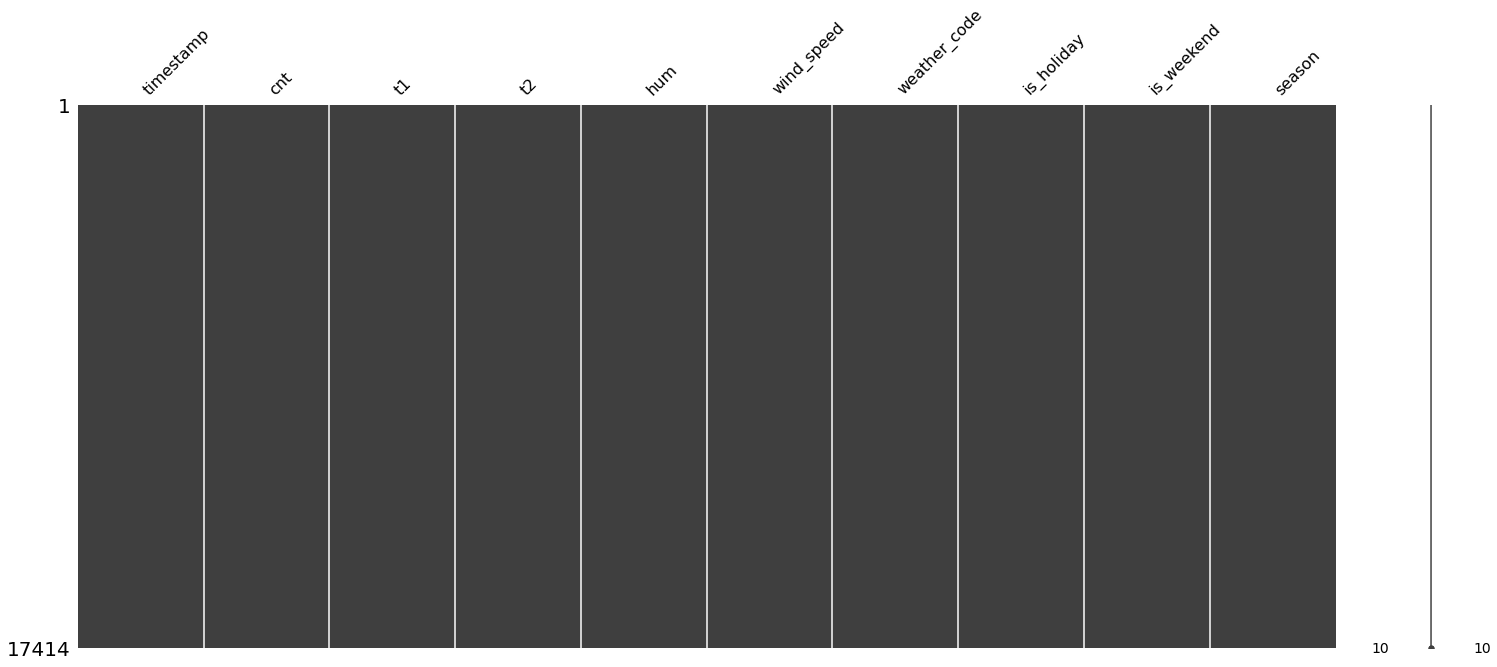

In [7]:
#결측치 시각화
msno.matrix(df)
plt.show()

In [8]:
# 시간에 대한 데이터 = timestamp변수 --> 년, 월, 일로 추출해서 추가적인 변수 생성 예정
df['year'] = df['timestamp'].dt.year # timestamp에서 년도를 추출해 df의 year라는 열을 만들어서 넣는다
df['month'] = df['timestamp'].dt.month
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


# EDA

## 1.histogram

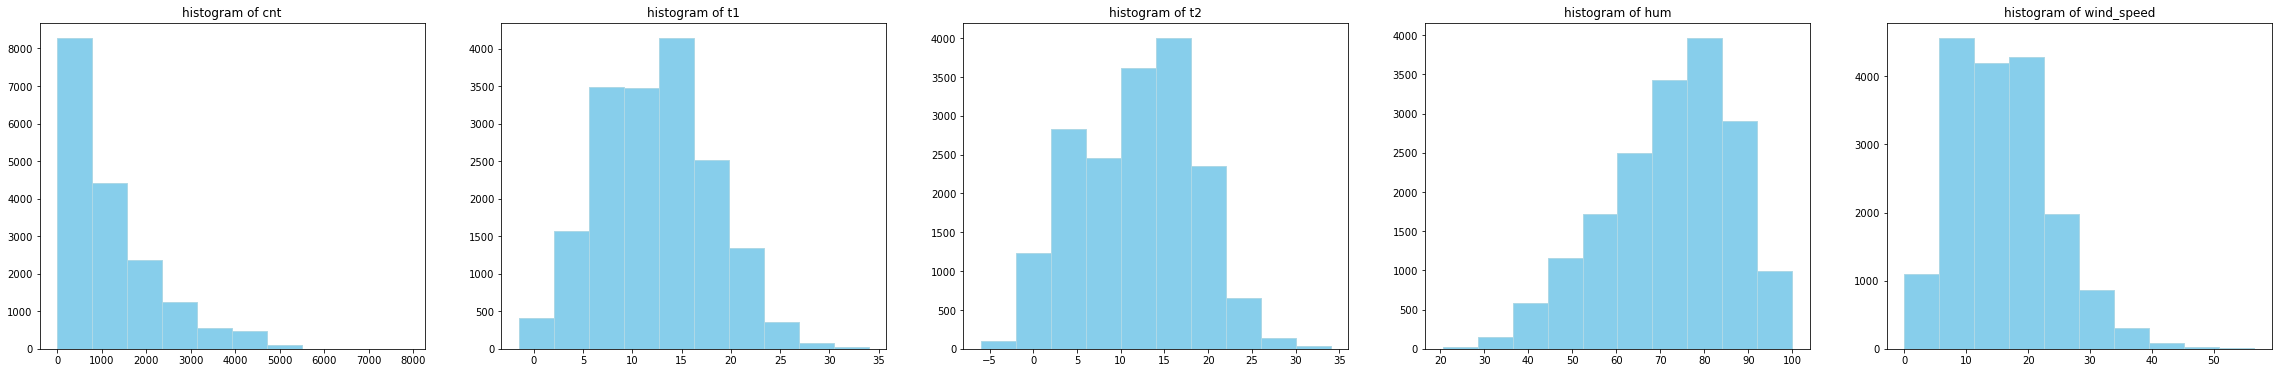

In [9]:
plt.figure(figsize=(40,6))
cols = ['cnt', 't1', 't2', 'hum', 'wind_speed']

for idx, x in enumerate(cols):
    plt.subplot(1,5,idx+1)
    plt.hist(df[x], color = 'skyblue', edgecolor='lightblue')
    plt.title('histogram of '+x)

## 2.Bar plot

In [10]:
df_weather = df['weather_code'].value_counts()

Text(0.5, 1.0, 'count of weather_code')

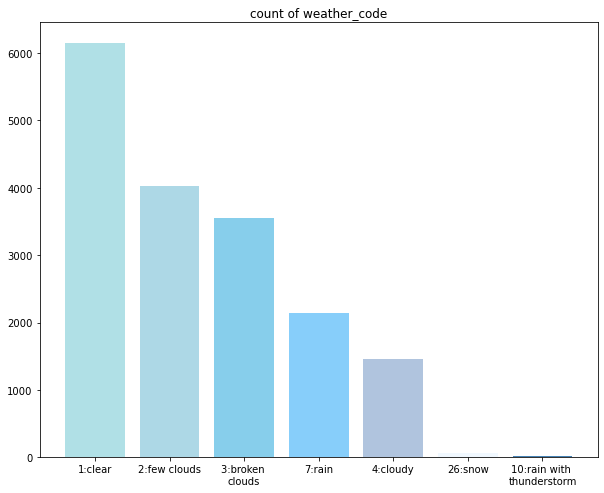

In [11]:
# 날씨별 count
plt.figure(figsize=(10,8))
x = np.arange(7)
weather = df.weather_code.value_counts()
plt.bar(x, weather, color = ['powderblue', 'lightblue', 'skyblue', 'lightskyblue', 'lightsteelblue', 'aliceblue','steelblue'])
plt.xticks(x, ['1:clear', '2:few clouds', '3:broken \nclouds', '7:rain', '4:cloudy', '26:snow','10:rain with \nthunderstorm'])
plt.title('count of weather_code')

Text(0, 0.5, 'cnt')

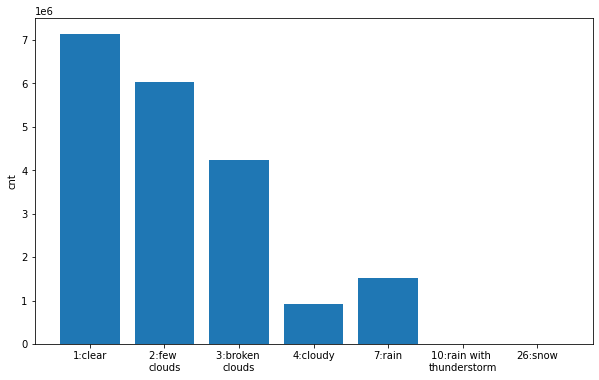

In [12]:
# 날씨별 이용자 
df2 = df[['cnt', 'weather_code']]
groups = df2.groupby('weather_code')
weather_cnt = groups.sum('cnt')

plt.figure(figsize=(10,6))
plt.bar(['1:clear', '2:few \nclouds', '3:broken \nclouds', '4:cloudy', '7:rain',  '10:rain with \nthunderstorm', '26:snow'], weather_cnt['cnt'])
plt.ylabel('cnt')

In [13]:
weather

1.0     6150
2.0     4034
3.0     3551
7.0     2141
4.0     1464
26.0      60
10.0      14
Name: weather_code, dtype: int64

Text(0.5, 1.0, 'count of is_holiday')

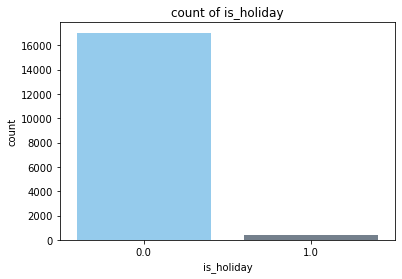

In [14]:
#공휴일X, 공휴일O 비교 
colors = ['lightskyblue', 'slategray']
sns.countplot(x=df['is_holiday'], palette = colors)
plt.title('count of is_holiday')

Text(0.5, 1.0, 'count of is_weekend')

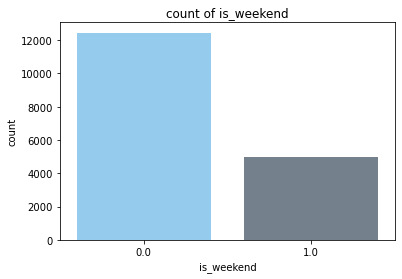

In [15]:
#주말X, 주말O 비교 
colors = ['lightskyblue', 'slategray']
sns.countplot(x=df['is_weekend'], palette = colors)
plt.title('count of is_weekend')

([<matplotlib.axis.XTick at 0x20aa93c1ca0>,
 [Text(0, 0, 'spring'),
  Text(1, 0, 'summer'),
  Text(2, 0, 'fall'),
  Text(3, 0, 'winter')])

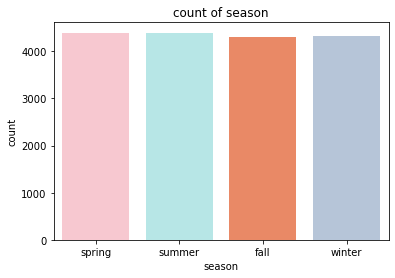

In [16]:
#날씨별 count
colors = ['pink', 'paleturquoise', 'coral', 'lightsteelblue']
sns.countplot(x=df['season'], palette = colors)
plt.title('count of season')
plt.xticks(np.arange(4), ['spring', 'summer', 'fall', 'winter'])

## 3. heatmap

<AxesSubplot:>

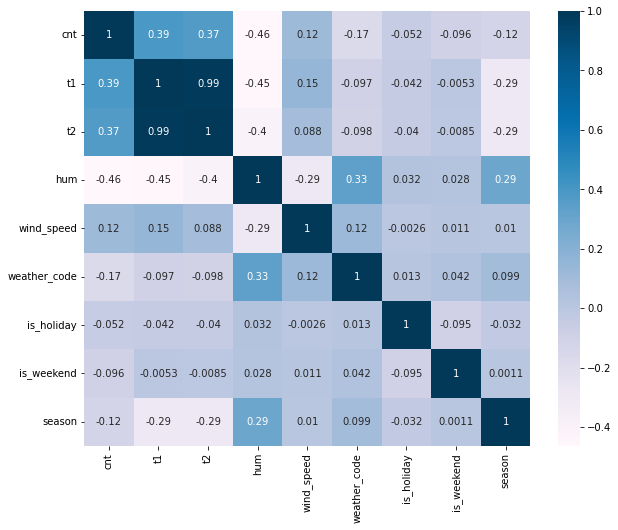

In [17]:
plt.figure(figsize=(10,8))
corr_df = df[['cnt', 't1', 't2', 'hum', 'wind_speed', 'weather_code', 'is_holiday', 'is_weekend', 'season']]
sns.heatmap(corr_df.corr(), annot=True, cmap=plt.cm.PuBu)

## 4. 시간 별(date, month, dayofweek, hour)로 데이터 살펴보기

In [19]:
df

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17409,2017-01-03 19:00:00,1042,5.0,1.0,81.0,19.0,3.0,0.0,0.0,3.0,2017,1,1,19
17410,2017-01-03 20:00:00,541,5.0,1.0,81.0,21.0,4.0,0.0,0.0,3.0,2017,1,1,20
17411,2017-01-03 21:00:00,337,5.5,1.5,78.5,24.0,4.0,0.0,0.0,3.0,2017,1,1,21
17412,2017-01-03 22:00:00,224,5.5,1.5,76.0,23.0,4.0,0.0,0.0,3.0,2017,1,1,22


In [20]:
#timestamp로 index 바꿔주기
df["timestamp"] = pd.to_datetime(df["timestamp"])
df = df.set_index("timestamp")
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour
timestamp,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4


In [21]:
df["dayofmonth"] = df.index.day
df.head()

,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season,year,month,dayofweek,hour,dayofmonth
timestamp,,,,,,,,,,,,,,
2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0,2015,1,6,0,4
2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0,2015,1,6,1,4
2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0,2015,1,6,2,4
2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0,2015,1,6,3,4
2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0,2015,1,6,4,4


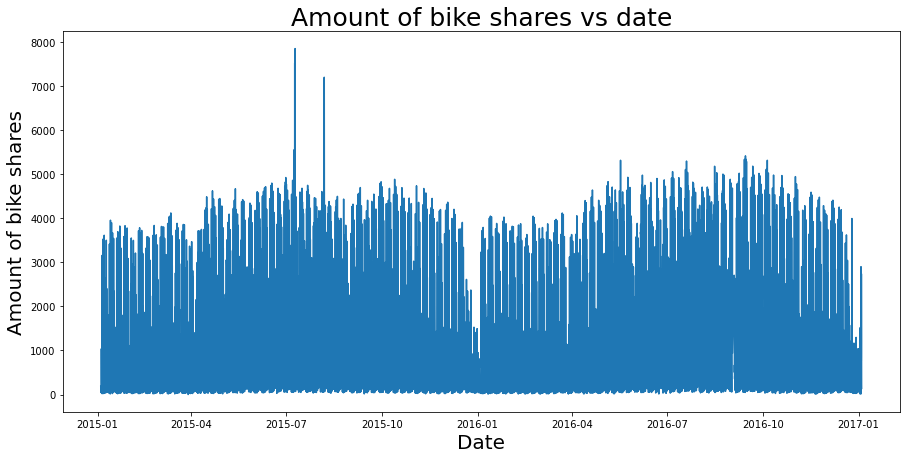

In [22]:
# timestamp 별로 이용자 수 보기
plt.figure(figsize=(15, 7))
ax = sns.lineplot(x=df.index, y=df.cnt,data=df)
ax.set_title("Amount of bike shares vs date", fontsize=25)
ax.set_xlabel("Date", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

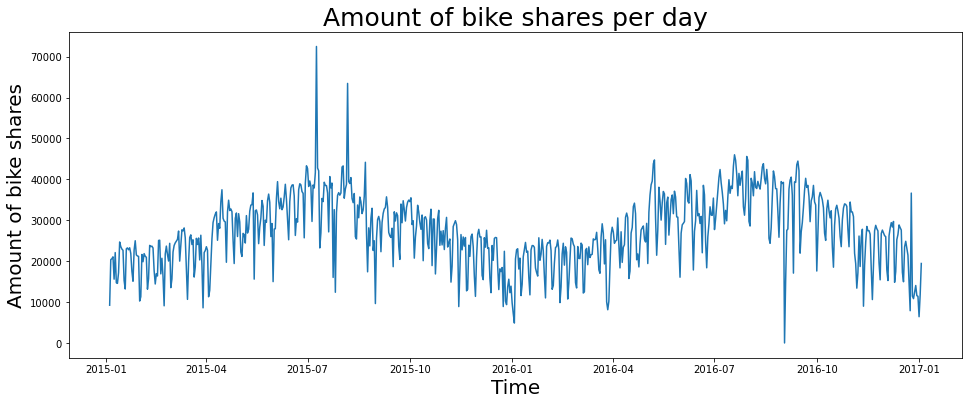

In [23]:
# 날짜별로 이용자 수 확인
df_by_week = df.resample("D").sum()

plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_week,x=df_by_week.index,y=df_by_week.cnt)
ax.set_title("Amount of bike shares per day", fontsize=25)
ax.set_xlabel("Time", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

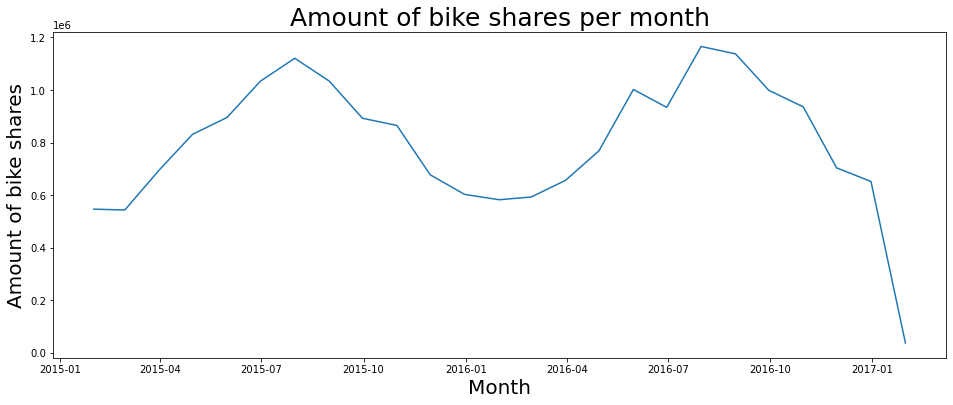

In [24]:
# 월별 이용자 
df_by_month = df.resample("M").sum()

plt.figure(figsize=(16,6))
ax = sns.lineplot(data=df_by_month,x=df_by_month.index,y=df_by_month.cnt)
ax.set_title("Amount of bike shares per month", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

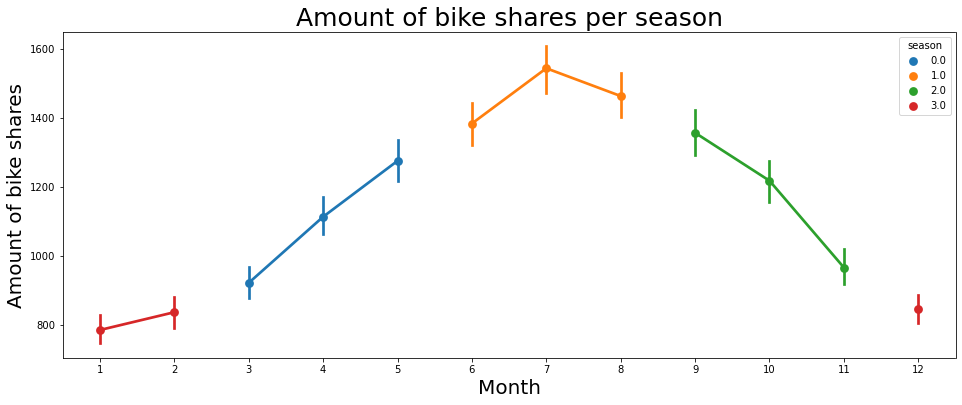

In [25]:
#시즌 별 이용자 수
plt.figure(figsize=(16,6))
ax = sns.pointplot(data=df,hue=df.season,y=df.cnt,x=df.month)
ax.set_title("Amount of bike shares per season", fontsize=25)
ax.set_xlabel("Month", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

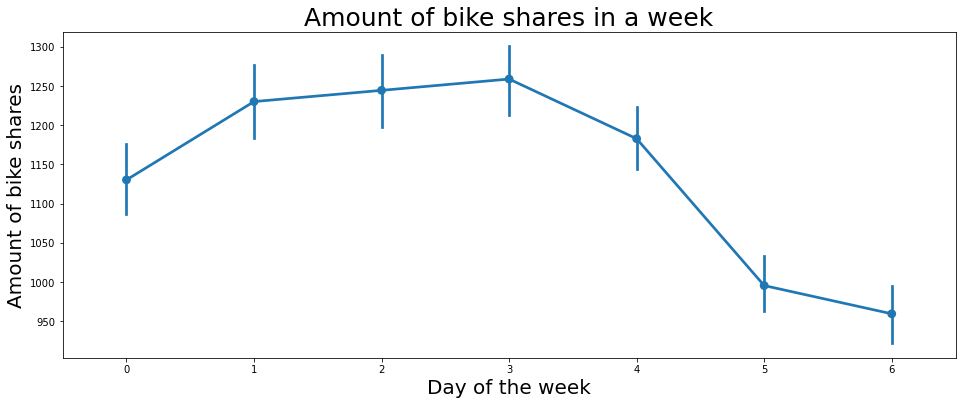

In [26]:
#요일별 이용자 수
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='dayofweek', y='cnt',data=df)
ax.set_title("Amount of bike shares in a week", fontsize=25)
ax.set_xlabel("Day of the week", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

## 5.공휴일, 주말 데이터 확인

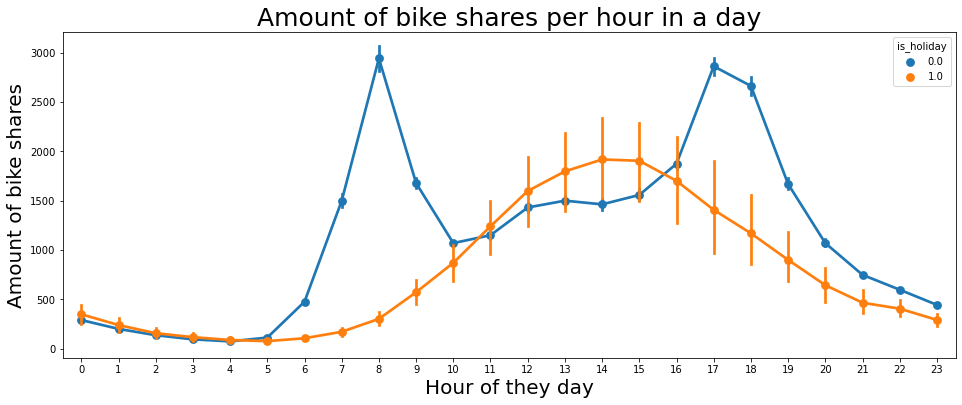

In [27]:
#공휴일과 비공휴일로 나눠서 시간대별 이용자 수 확
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='hour', y='cnt',hue='is_holiday',data=df)
ax.set_title("Amount of bike shares per hour in a day", fontsize=25)
ax.set_xlabel("Hour of they day", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

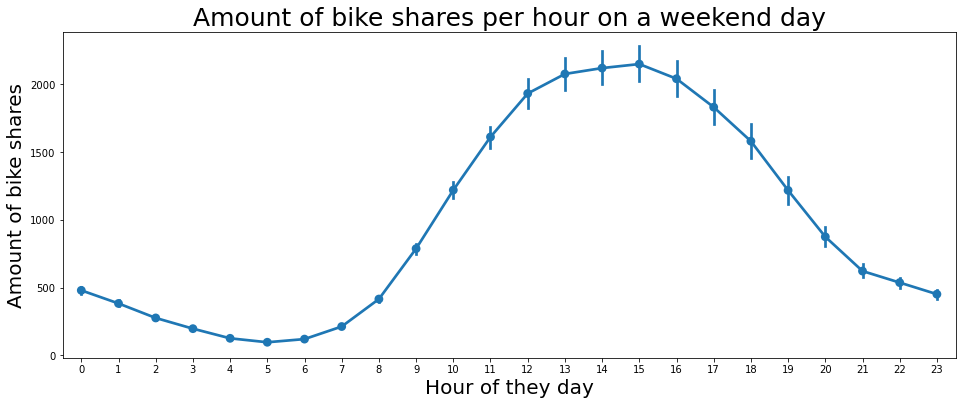

In [28]:
# 주말에 시간대별 이용자 
plt.figure(figsize=(16, 6))
ax = sns.pointplot(x='hour', y='cnt',data=df[df["is_weekend"]==1])
ax.set_title("Amount of bike shares per hour on a weekend day", fontsize=25)
ax.set_xlabel("Hour of they day", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.show()

## 6. 기온, 습도, 풍속 별 이용자 수

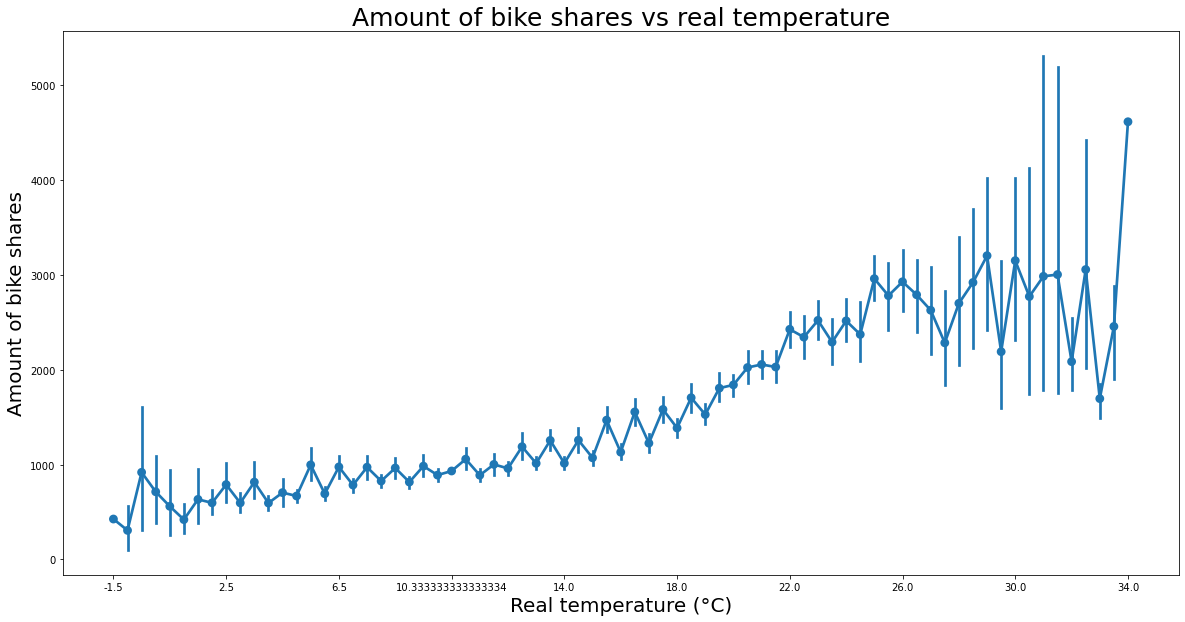

In [29]:
plt.figure(figsize=(20,10))

ax = sns.pointplot(x='t1', y='cnt',data=df)
ax.set_title("Amount of bike shares vs real temperature", fontsize=25)
ax.set_xlabel("Real temperature (°C)", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.locator_params(axis='x', nbins=10)

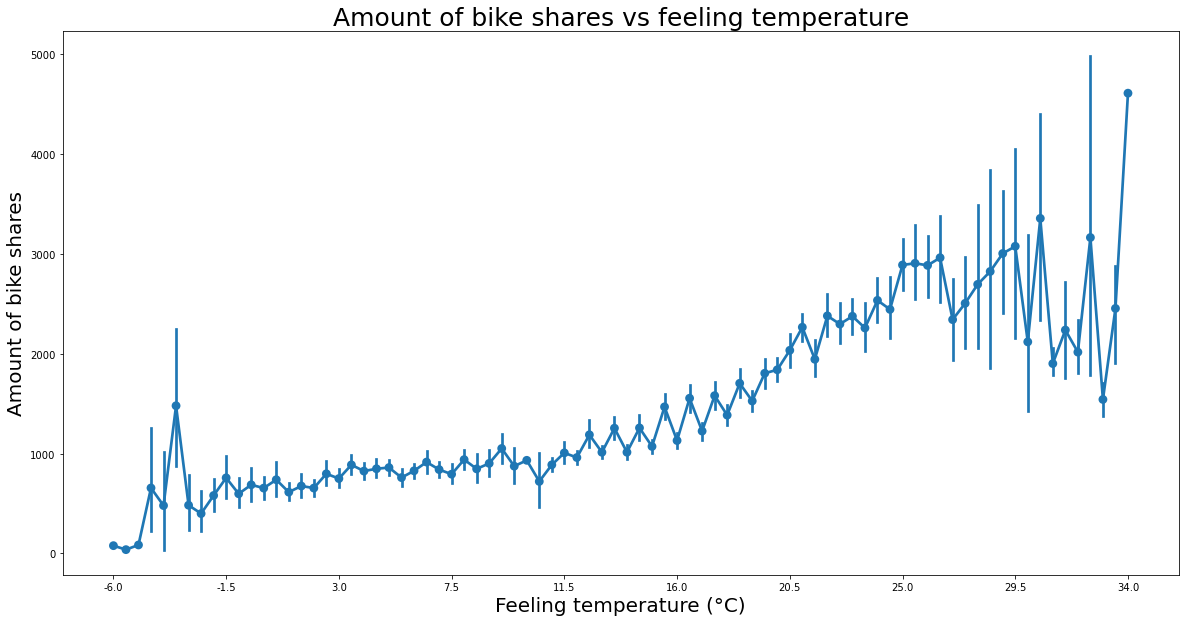

In [30]:
#체감온도도 확인
plt.figure(figsize=(20,10))

ax = sns.pointplot(x='t2', y='cnt',data=df)
ax.set_title("Amount of bike shares vs feeling temperature", fontsize=25)
ax.set_xlabel("Feeling temperature (°C)", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.locator_params(axis='x', nbins=10)
plt.show()

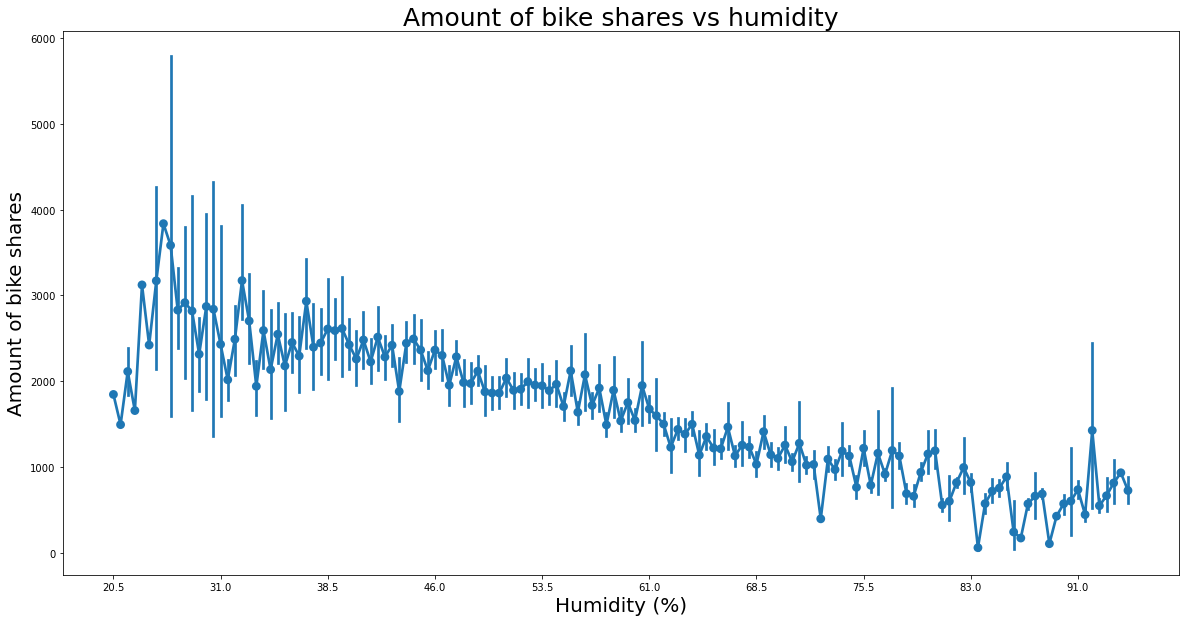

In [31]:
#습도별 이용자 
plt.figure(figsize=(20,10))

ax = sns.pointplot(x='hum', y='cnt',data=df)
ax.set_title("Amount of bike shares vs humidity", fontsize=25)
ax.set_xlabel("Humidity (%)", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.locator_params(axis='x', nbins=10)
plt.show()

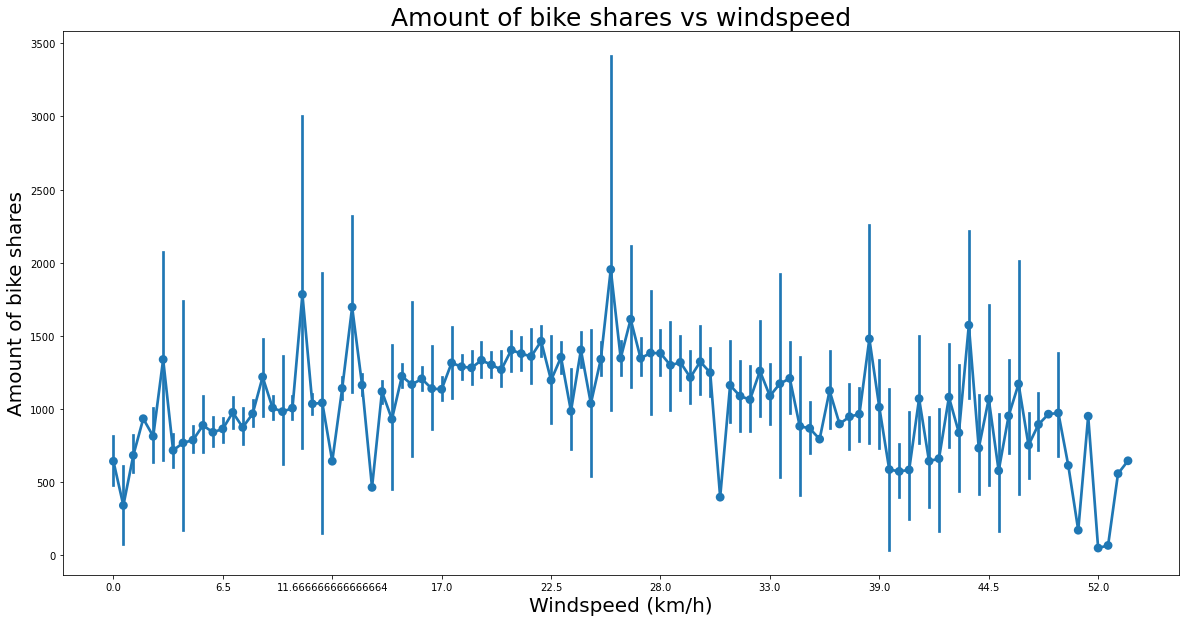

In [32]:
# 풍속 별 이용자 수
plt.figure(figsize=(20,10))

ax = sns.pointplot(x='wind_speed', y='cnt',data=df)
ax.set_title("Amount of bike shares vs windspeed", fontsize=25)
ax.set_xlabel("Windspeed (km/h)", fontsize=20)
ax.set_ylabel('Amount of bike shares', fontsize=20)
plt.locator_params(axis='x', nbins=10)
plt.show()

## 7. 이상치 제거

In [33]:
# 이상치 제거
# mean : 평균, std : 표준편차
# 시그마 이상치 제거: 데이터를 정규분포로 봤을때 양 극단을 이상치로 보고 제거
#                   평균에서 세배만큼 최대 최소로 지정, 실제로 제거하는 값은 전체 데이터에서 양 극단의 값을 0.3% 만큼 제거한다고 보면 됨
def is_outliers(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)
    return ~s.between(lower_limit, upper_limit)

In [34]:
# 이상치 시간별로 제거
df_out = df[~df.groupby('hour')['cnt'].apply(is_outliers)]

print('이상치 제거 전:', df.shape)
print('이상치 제거 후: ', df_out.shape)

이상치 제거 전: (17414, 14)
이상치 제거 후:  (17265, 14)


# Machine learning Modeling

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)
np.random.RandomState(42)

import warnings
import sklearn.exceptions
warnings.filterwarnings("ignore", category=sklearn.exceptions.ConvergenceWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import seaborn as sns

import time

import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm, skew, kurtosis

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, TimeSeriesSplit, GridSearchCV,cross_val_score 
from sklearn import preprocessing
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor, AdaBoostRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_absolute_error,r2_score, mean_squared_log_error,mean_squared_error, make_scorer

In [4]:
df = pd.read_csv('london_merged.csv', parse_dates=['timestamp']) # timestamp를 datetime 형태로 가져오기
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
df = pd.read_csv('../input/london-bike-sharing-dataset/london_merged.csv', parse_dates=['timestamp']) # timestamp를 datetime 형태로 가져오기
df.head()

In [6]:
# 월, 년, 일, 시간 변수 생
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df['day']= df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour

In [7]:
def is_outliers(s):
    lower_limit = s.mean() - (s.std()*3)
    upper_limit = s.mean() + (s.std()*3)
    return ~s.between(lower_limit, upper_limit)

In [8]:
df = df[~df.groupby('hour')['cnt'].apply(is_outliers)]

## 1. 변수 변환

<AxesSubplot:xlabel='cnt', ylabel='Density'>

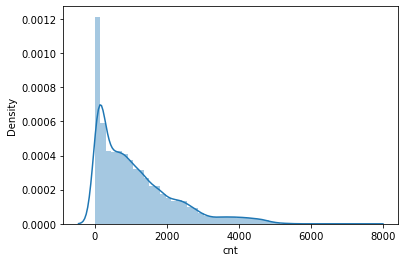

In [10]:
sns.distplot(df['cnt'])

In [11]:
# cnt가 왼쪽으로 치우쳐 있으므로 로그 변환하여 진행
# 원래 값으로 가려면 numpy.expm1()
df['count_log'] = np.log1p(df['cnt'])

<AxesSubplot:xlabel='count_log', ylabel='Density'>

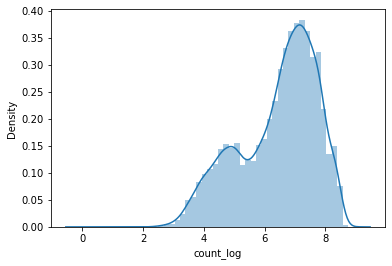

In [12]:
sns.distplot(df['count_log'])

In [13]:
# 공휴일, 주말 여부로 나누
df_non_weekend = df[df['is_weekend'] == 0]
df_non_weekend = df_non_weekend.drop(['is_holiday','is_weekend'],axis=1)
df_is_weekend = df[df['is_weekend'] == 1]
df_is_weekend = df_is_weekend.drop(['is_holiday','is_weekend'],axis=1)
df_is_holiday = df[df['is_holiday'] == 1]
df_is_holiday = df_is_holiday.drop(['is_holiday','is_weekend'],axis=1)
df_non_holiday = df[df['is_holiday'] == 0]
df_non_holiday = df_non_holiday.drop(['is_holiday','is_weekend'],axis=1)

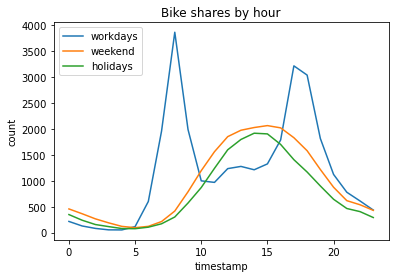

In [14]:
df.groupby(by=df_non_weekend.timestamp.dt.hour)['cnt'].mean().plot()
df.groupby(by=df_is_weekend.timestamp.dt.hour)['cnt'].mean().plot()
df.groupby(by=df_is_holiday.timestamp.dt.hour)['cnt'].mean().plot()
plt.title('Bike shares by hour')
plt.ylabel('count')
plt.legend(['workdays','weekend','holidays'],loc=2, fontsize = 'medium')

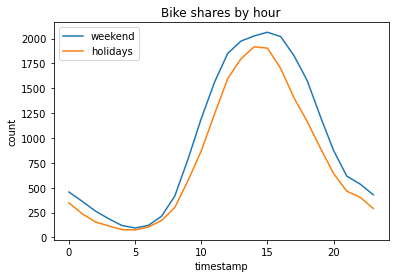

In [15]:
df.groupby(by=df_is_weekend.timestamp.dt.hour)['cnt'].mean().plot()
df.groupby(by=df_is_holiday.timestamp.dt.hour)['cnt'].mean().plot()
plt.title('Bike shares by hour')
plt.ylabel('count')
plt.legend(['weekend','holidays'],loc=2, fontsize = 'medium')

In [16]:
# 휴일,주말 두가지 다 사용하지 않고 일안하는 날과 일 하는날로만 구분
df['is_non_workday'] = df['is_holiday'] + df['is_weekend']
df = df.drop(['is_holiday','is_weekend'],axis=1)

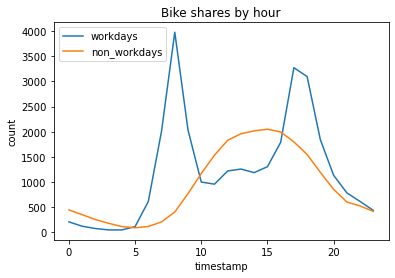

In [17]:
df__workday = df[df['is_non_workday'] == 0]
df_non_workday = df[df['is_non_workday'] == 1]

df.groupby(by=df__workday.timestamp.dt.hour)['cnt'].mean().plot()
df.groupby(by=df_non_workday.timestamp.dt.hour)['cnt'].mean().plot()
plt.title('Bike shares by hour')
plt.ylabel('count')
plt.legend(['workdays','non_workdays'],loc=2, fontsize = 'medium')

In [18]:
# 월, 년, 일, 시간 변수 생
df['month'] = df['timestamp'].dt.month
df['year'] = df['timestamp'].dt.year
df['day']= df['timestamp'].dt.dayofweek
df['hour'] = df['timestamp'].dt.hour

In [19]:
# 시간, 월 단위는 주기성을 띄기 때문에 sin,cos함수 적용
df['hour' + '_sin'] = np.sin(2 * np.pi * df['hour'] / 23)
df['hour' + '_cos'] = np.cos(2 * np.pi * df['hour'] / 23)

df['month' + '_sin'] = np.sin(2 * np.pi * df['month'] / 12)
df['month' + '_cos'] = np.cos(2 * np.pi * df['month'] / 12)

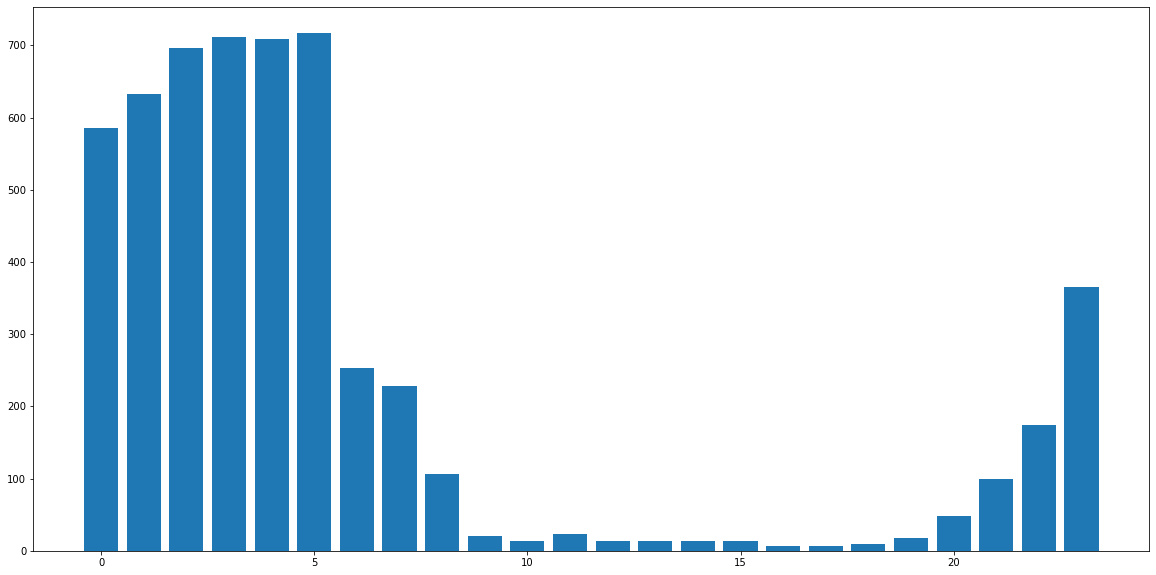

In [20]:
#london['count_log']<6 시간별
# 대략적인 중위수보다 작은 데이터가 밤에 주로 분포함. 즉, 사용자가 적은 시간대는 밤이다.
plt.figure(figsize=(20,10))

test = df[df['count_log']<6].groupby(by='hour').count()
plt.bar(test.index, test['cnt'])
plt.show()

## 2. 변수 만들어 보기

In [21]:
# 밤인지 아닌지 확인하는 isnight 변수 추가
df_n = df.copy()

df_n['is_night'] = 0
df_n.loc[(df_n['hour'] < 8) | (df_n['hour'] > 20), 'is_night'] = 1

In [22]:
#출퇴근 시간이 유독 이용자가 많아서 is_rushHour 추가
df_r = df.copy()

df_r['is_rushHour'] = 0
df_r.loc[(df_r['hour'] == 8) & (df_r['is_non_workday'] == 1), 'is_rushHour'] = 1
df_r.loc[(df_r['hour'] == 17) & (df_r['is_non_workday'] == 1), 'is_rushHour'] = 1
df_r.loc[(df_r['hour'] == 18) & (df_r['is_non_workday'] == 1), 'is_rushHour'] = 1

In [23]:
#is_night, is_rushHour 둘 다 추가해서도 진행해 볼 예정
df_both = df.copy()

df_both['is_night'] = 0
df_both.loc[(df_both['hour'] < 8) | (df_both['hour'] > 20), 'is_night'] = 1

df_both['is_rushHour'] = 0
df_both.loc[(df_both['hour'] == 8) & (df_both['is_non_workday'] == 1), 'is_rushHour'] = 1
df_both.loc[(df_both['hour'] == 17) & (df_both['is_non_workday'] == 1), 'is_rushHour'] = 1
df_both.loc[(df_both['hour'] == 18) & (df_both['is_non_workday'] == 1), 'is_rushHour'] = 1

In [24]:
def rmsle(y, y_pred):
    y = np.expm1(y)
    y_pred=y_pred.clip(min=0)
    y_pred=y_pred.clip(max=10)
    y_pred = np.expm1(y_pred)
    return np.sqrt(mean_squared_log_error( y, y_pred))

rmsle_scorer = make_scorer(rmsle, greater_is_better=False)
tscv = TimeSeriesSplit(n_splits=5)


def test_algorithms():
    
    names = ["LinearRegression", "Random Forrest", "XGBoost", "SVR" , "AdaBoost",
             "BaggingRegressor"]
    
    regressors = [
        LinearRegression(),
        RandomForestRegressor(random_state=42),
        XGBRegressor(objective ='reg:squarederror',random_state=42),
        SVR(),
        AdaBoostRegressor(random_state=42),
        BaggingRegressor(random_state=42)    
        ]
    
    data_X = [X_dummies,X_train ,X_train ,X_dummies ,X_train ,X_train ]
    reg_columns=['algorithm','score_rmsle_mean','score_std','time']
    reg_performance = pd.DataFrame(columns=reg_columns)
    print('Please wait 1-2 minutes for all algorithms to complete.') 
    
    for name, regressor, X_trains in zip(names, regressors,data_X):
        time_start = time.time()
        cv_results = cross_val_score(regressor, X_trains,y_train, cv=5 ,scoring = rmsle_scorer)
        time_end = round(time.time() - time_start,3)
        mean_score = round(-cv_results.mean(),4)
        std_score = round(cv_results.std(),4)
        t= pd.DataFrame([[name,mean_score,std_score,time_end]],columns = reg_columns)
        reg_performance = reg_performance.append(t, ignore_index=True)
        print(name , ' RMSLE = ',mean_score , 'with std=',std_score ," execution_time =  ", time_end,"s")
        
    return reg_performance

In [55]:
# modeling - 변수추가 x
df_1 = df.drop(['timestamp','cnt'],axis=1)
X = df_1.drop(['count_log'], axis=1)
y = df_1['count_log']
scaler_x = preprocessing.MinMaxScaler()
X =  pd.DataFrame(scaler_x.fit_transform(X), columns = X.columns)

# X - split
split_index = int(0.7 * len(X))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]

# y - split
split_index = int(0.7 * len(y))
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


columns = ['weather_code','season','is_non_workday']
X_dummies = pd.get_dummies(X_train, columns=columns)
X_dummies = X_dummies.drop(['day','year','month'],axis=1)


reg_performance = test_algorithms()
reg_performance

Please wait 1-2 minutes for all algorithms to complete.
LinearRegression  RMSLE =  0.7502 with std= 0.0188  execution_time =   0.092 s
Random Forrest  RMSLE =  0.2642 with std= 0.0494  execution_time =   21.372 s
XGBoost  RMSLE =  0.2629 with std= 0.0467  execution_time =   2.884 s
SVR  RMSLE =  0.4229 with std= 0.0318  execution_time =   41.722 s
AdaBoost  RMSLE =  0.5141 with std= 0.0581  execution_time =   3.6 s
BaggingRegressor  RMSLE =  0.2781 with std= 0.0485  execution_time =   2.151 s


,algorithm,score_rmsle_mean,score_std,time
0,LinearRegression,0.7502,0.0188,0.092
1,Random Forrest,0.2642,0.0494,21.372
2,XGBoost,0.2629,0.0467,2.884
3,SVR,0.4229,0.0318,41.722
4,AdaBoost,0.5141,0.0581,3.600
5,BaggingRegressor,0.2781,0.0485,2.151


In [56]:
# modeling - is_night 추가
df_2 = df_n.drop(['timestamp','cnt'],axis=1)
X = df_2.drop(['count_log'], axis=1)
y = df_2['count_log']
scaler_x = preprocessing.MinMaxScaler()
X =  pd.DataFrame(scaler_x.fit_transform(X), columns = X.columns)

# X - split
split_index = int(0.7 * len(X))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]

# y - split
split_index = int(0.7 * len(y))
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

columns = ['weather_code','season','is_non_workday', 'is_night']
X_dummies = pd.get_dummies(X_train, columns=columns)
X_dummies = X_dummies.drop(['day','year','month'],axis=1)

reg_performance = test_algorithms()
reg_performance

Please wait 1-2 minutes for all algorithms to complete.
LinearRegression  RMSLE =  0.7309 with std= 0.0198  execution_time =   0.101 s
Random Forrest  RMSLE =  0.2655 with std= 0.0501  execution_time =   21.982 s
XGBoost  RMSLE =  0.2647 with std= 0.0456  execution_time =   3.43 s
SVR  RMSLE =  0.3607 with std= 0.0361  execution_time =   42.101 s
AdaBoost  RMSLE =  0.5318 with std= 0.0431  execution_time =   4.452 s
BaggingRegressor  RMSLE =  0.2796 with std= 0.0479  execution_time =   2.667 s


,algorithm,score_rmsle_mean,score_std,time
0,LinearRegression,0.7309,0.0198,0.101
1,Random Forrest,0.2655,0.0501,21.982
2,XGBoost,0.2647,0.0456,3.430
3,SVR,0.3607,0.0361,42.101
4,AdaBoost,0.5318,0.0431,4.452
5,BaggingRegressor,0.2796,0.0479,2.667


In [57]:
# modeling - is_rushour 추가
df_3 = df_r.drop(['timestamp','cnt'],axis=1)
X = df_3.drop(['count_log'], axis=1)
y = df_3['count_log']
scaler_x = preprocessing.MinMaxScaler()
X =  pd.DataFrame(scaler_x.fit_transform(X), columns = X.columns)

# X - split
split_index = int(0.7 * len(X))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]

# y - split
split_index = int(0.7 * len(y))
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

columns = ['weather_code','season','is_non_workday', 'is_rushHour']
X_dummies = pd.get_dummies(X_train, columns=columns)
X_dummies = X_dummies.drop(['day','year','month'],axis=1)

reg_performance = test_algorithms()
reg_performance

Please wait 1-2 minutes for all algorithms to complete.
LinearRegression  RMSLE =  0.7501 with std= 0.0188  execution_time =   0.099 s
Random Forrest  RMSLE =  0.2652 with std= 0.0504  execution_time =   24.654 s
XGBoost  RMSLE =  0.2671 with std= 0.0487  execution_time =   3.193 s
SVR  RMSLE =  0.4338 with std= 0.0318  execution_time =   40.218 s
AdaBoost  RMSLE =  0.5157 with std= 0.0529  execution_time =   4.084 s
BaggingRegressor  RMSLE =  0.2783 with std= 0.049  execution_time =   2.304 s


,algorithm,score_rmsle_mean,score_std,time
0,LinearRegression,0.7501,0.0188,0.099
1,Random Forrest,0.2652,0.0504,24.654
2,XGBoost,0.2671,0.0487,3.193
3,SVR,0.4338,0.0318,40.218
4,AdaBoost,0.5157,0.0529,4.084
5,BaggingRegressor,0.2783,0.0490,2.304


In [58]:
# modeling - 두개 모두 추가
df_4 = df_both.drop(['timestamp','cnt'],axis=1)
X = df_4.drop(['count_log'], axis=1)
y = df_4['count_log']
scaler_x = preprocessing.MinMaxScaler()
X =  pd.DataFrame(scaler_x.fit_transform(X), columns = X.columns)

# X - split
split_index = int(0.7 * len(X))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]

# y - split
split_index = int(0.7 * len(y))
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

columns = ['weather_code','season','is_non_workday', 'is_night','is_rushHour']
X_dummies = pd.get_dummies(X_train, columns=columns)
X_dummies = X_dummies.drop(['day','year','month'],axis=1)

reg_performance = test_algorithms()
reg_performance

Please wait 1-2 minutes for all algorithms to complete.
LinearRegression  RMSLE =  0.7292 with std= 0.0191  execution_time =   0.09 s
Random Forrest  RMSLE =  0.2645 with std= 0.0497  execution_time =   22.944 s
XGBoost  RMSLE =  0.2656 with std= 0.0462  execution_time =   3.153 s
SVR  RMSLE =  0.3664 with std= 0.0349  execution_time =   41.645 s
AdaBoost  RMSLE =  0.5234 with std= 0.0428  execution_time =   3.842 s
BaggingRegressor  RMSLE =  0.2799 with std= 0.046  execution_time =   2.687 s


,algorithm,score_rmsle_mean,score_std,time
0,LinearRegression,0.7292,0.0191,0.090
1,Random Forrest,0.2645,0.0497,22.944
2,XGBoost,0.2656,0.0462,3.153
3,SVR,0.3664,0.0349,41.645
4,AdaBoost,0.5234,0.0428,3.842
5,BaggingRegressor,0.2799,0.0460,2.687


## 변수 추가했을 때 모델에 따라 성능이 좋아지기도 하고 안 좋아지기도 하는 것을 확인했고, accuracy 측면에서 보면 best 모델은 변수 추가하지 않고 xgboost를 사용했을 때이다.

## 3. grid search를 통한 파라미터 최적화

In [59]:
#그리드 서치
# modeling -  변수 추가x, xgboost
df_final = df.drop(['timestamp','cnt'],axis=1)
X = df_final.drop(['count_log'], axis=1)
y = df_final['count_log']
scaler_x = preprocessing.MinMaxScaler()
X =  pd.DataFrame(scaler_x.fit_transform(X), columns = X.columns)

# X - split
split_index = int(0.7 * len(X))
X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]

# y - split
split_index = int(0.7 * len(y))
y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]


xgb1 = XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [0.01,0.03, 0.05, 0.07],
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [300,500,700]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 3,
                        n_jobs = 5,
                        verbose=True)

xgb_grid.fit(X_train,y_train)

print(xgb_grid.best_params_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
[15:24:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[15:24:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [26]:
final_model = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.03, max_depth= 5, min_child_weight= 4, 
                           n_estimators= 500, nthread= 4, objective= 'reg:squarederror', subsample= 0.7)
final_model.fit(X_train,y_train)

cv_results = cross_val_score(final_model, X_train,y_train, cv=5 ,scoring = rmsle_scorer)
mean_score = round(-cv_results.mean(),4)
print(mean_score)

0.2451


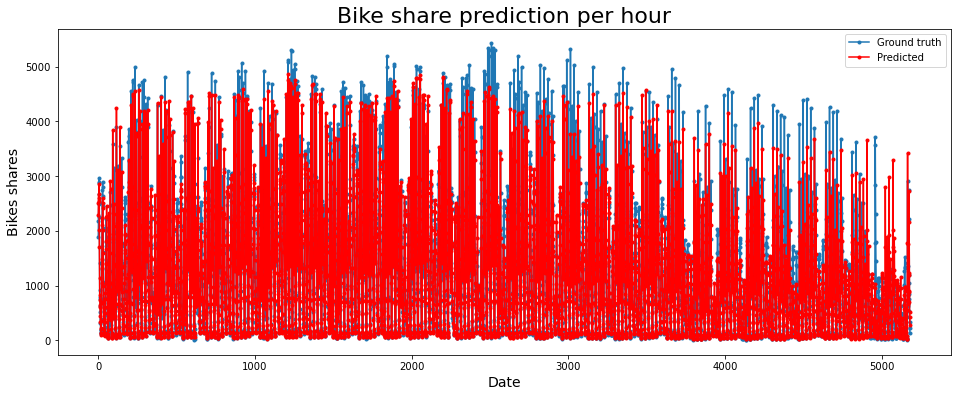

In [27]:
preds = final_model.predict(X_test)
orgin_preds =  np.expm1(preds)
orgin_cnt = np.expm1(y_test)

plt.figure(figsize=(16,6))
plt.plot(orgin_cnt.values,marker=".",label="actual")
plt.plot(orgin_preds,marker=".",label="prediction",color="r")

plt.title('Bike share prediction per hour', fontsize=22)
plt.xlabel(xlabel='Date', fontsize=14)
plt.ylabel(ylabel='Bikes shares', fontsize=14)
plt.legend(['Ground truth', 'Predicted'])

plt.show()

# RNN

In [64]:
df = pd.read_csv('london_merged.csv', parse_dates = ['timestamp'])
df.head()

,timestamp,cnt,t1,t2,hum,wind_speed,weather_code,is_holiday,is_weekend,season
0,2015-01-04 00:00:00,182,3.0,2.0,93.0,6.0,3.0,0.0,1.0,3.0
1,2015-01-04 01:00:00,138,3.0,2.5,93.0,5.0,1.0,0.0,1.0,3.0
2,2015-01-04 02:00:00,134,2.5,2.5,96.5,0.0,1.0,0.0,1.0,3.0
3,2015-01-04 03:00:00,72,2.0,2.0,100.0,0.0,1.0,0.0,1.0,3.0
4,2015-01-04 04:00:00,47,2.0,0.0,93.0,6.5,1.0,0.0,1.0,3.0


In [ ]:
df = pd.read_csv('/kaggle/input/london-bike-sharing-dataset/london_merged.csv', parse_dates = ['timestamp'])
df.head()

In [65]:
df['timestamp'] 

0       2015-01-04 00:00:00
1       2015-01-04 01:00:00
2       2015-01-04 02:00:00
3       2015-01-04 03:00:00
4       2015-01-04 04:00:00
                ...        
17409   2017-01-03 19:00:00
17410   2017-01-03 20:00:00
17411   2017-01-03 21:00:00
17412   2017-01-03 22:00:00
17413   2017-01-03 23:00:00
Name: timestamp, Length: 17414, dtype: datetime64[ns]

In [66]:
# train data, test data 분리
train = df.iloc[:17000, 1:2]
test = df.iloc[17000:17414, 1:2]

In [67]:
print(train.shape)
print(test.shape)

(17000, 1)
(414, 1)


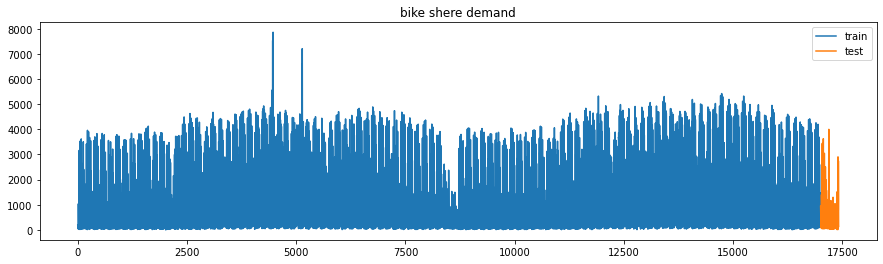

In [68]:
df['cnt'][:17000].plot(figsize=(15, 4), legend=True)
df['cnt'][17000:].plot(figsize=(15, 4), legend=True)
plt.legend(['train', 'test'])
plt.title('bike shere demand')
plt.show()

In [69]:
# 차수 추정
from statsmodels.tsa.stattools import pacf

pacf = pacf(df['cnt'], nlags=20, method='ols')
print(pacf)

[ 1.          0.78148357 -0.41172684  0.18486682 -0.07510114 -0.09947694
 -0.08494917 -0.00403993  0.0920456   0.07065422 -0.32935188 -0.06873344
  0.05112775  0.04852911  0.06695059 -0.19621297 -0.07610221  0.14365297
 -0.11638129  0.18990804  0.16480713]


<bound method Figure.show of <Figure size 432x288 with 1 Axes>>

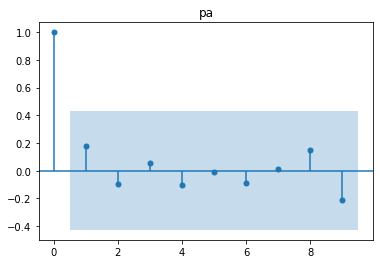

In [70]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(pacf, lags=9, method='ols', title='pa').show

In [71]:
# 0~1사이 값으로 데이터 변환 -> 정규분포 따르게 함.
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
train_scaled = sc.fit_transform(train)

In [72]:
train_scaled

array([[0.02315522],
       [0.01755725],
       [0.01704835],
       ...,
       [0.17468193],
       [0.16348601],
       [0.14083969]])

In [73]:
X_train = []
y_train = []

for i in range(1, 17000):
    X_train.append(train_scaled[i-1:i, 0])
    y_train.append(train_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)

In [74]:
X_train.shape

(16999, 1)

In [75]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_train.shape

(16999, 1, 1)

In [76]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers.recurrent import SimpleRNN

In [77]:
# 모델 설계
rnn = Sequential()
rnn.add(SimpleRNN(activation='relu', units=6, input_shape=(1,1)))
rnn.add(Dense(activation='linear', units=1))

In [78]:
print(rnn.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 6)                 48        
                                                                 
 dense (Dense)               (None, 1)                 7         
                                                                 
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________
None


In [79]:
rnn.compile(loss='mse', optimizer='adam', metrics=['mse'])

In [80]:
# 모델 training
rnn.fit(X_train, y_train, batch_size=1, epochs=2)

# 한 시간 전 데이터로 training
#loss 감소 확인

Epoch 1/2
16999/16999 [==============================] - 27s 2ms/step - loss: 0.0072 - mse: 0.0072
Epoch 2/2
16999/16999 [==============================] - 27s 2ms/step - loss: 0.0068 - mse: 0.0068


In [81]:
inputs = sc.transform(test)
inputs.shape

(414, 1)

In [82]:
X_test = []
for i in range(1, 415):
    X_test.append(inputs[i-1:i, 0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
X_test.shape

(414, 1, 1)

In [83]:
rnn = rnn.predict(X_test)
rnn = sc.inverse_transform(rnn)

In [84]:
test1 = pd.DataFrame(test)
rnn1 = pd.DataFrame(rnn)

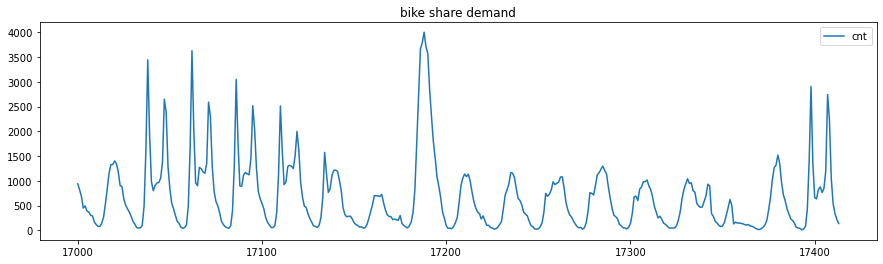

In [85]:
# 자전거 이용객 수 실제값
test1.plot(figsize=(15, 4), legend=True)
plt.legend(['cnt'])
plt.title('bike share demand')
plt.show()

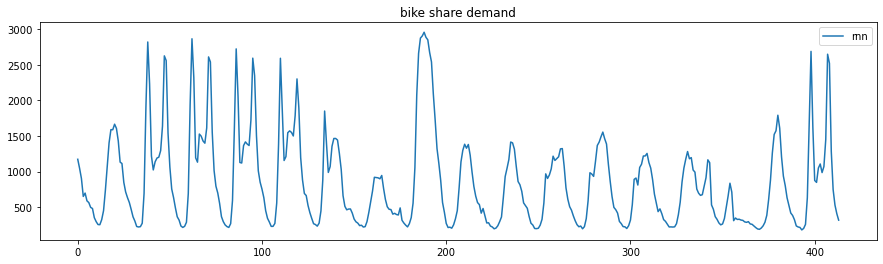

In [86]:
# 자전거 이용객 수 예측값
rnn1.plot(figsize=(15, 4), legend=True)
plt.legend(['rnn'])
plt.title('bike share demand')
plt.show()

In [87]:
test = np.array(test)

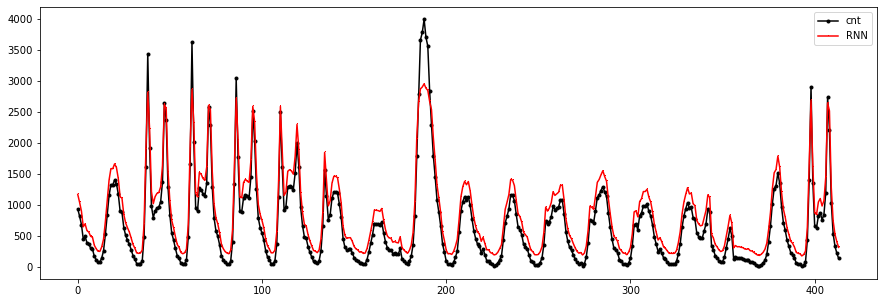

In [88]:
# 자전거 이용객 수 실제값, 예측값
plt.figure(figsize=(15,5))
plt.plot(test, marker='.', label='cnt', color='black')
plt.plot(rnn, marker=',', label='RNN', color='red')
plt.legend()